# Writing a Data Scientist Blog Post

### Business understanding

As the technology landscape evolves rapidly, it is crucial to understand the preferences and trends among developers. In this blog post, we dive into the annual Stack Overflow survey results from 2018 to 2022 to uncover valuable insights. Our analysis focuses on three key questions: the most popular web frameworks, the most desired programming languages, and the preferred tools and technologies for web developers.

The datasets I will pick up are the stack overflow surveys ranged for 5 years from 2018 to 2022. By doing this, I could analyze the historical data overtime and hopefully be able to predict the trend for the upcoming years.

The key motivations of this analysis is to answer these questions:

1. Over a 5 years span, what are the most popular web frameworks used by the developers, which framework is the most desired one for the developers to wotk with.

2. Similarly, I want to know over a 5 years span, which programming language is the most desired one for the developers to work with.

3. For the web developers, what are the tools/technologies the developers want to work with.

### Data Understanding

#### Collect initial data


In [1]:
# import dependencies

import os
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from typing import List

In [2]:
base_dir = os.path.abspath(os.getcwd())

In [3]:
base_dir

'/home/tony/projects/uda_data_science_blog'

In [5]:
zip_list = ['survey_results_public_2018.zip', 'survey_results_public_2019.zip', 'survey_results_public_2020.zip', 'survey_results_public_2021.zip', 'survey_results_public_2022.zip']

def process_csv_files(base_dir:str, zip_list:List):
    """
    Description: This function can be used to read the zip file in the filepath (data)
    to unzip all the csv files into data folder for further processing.

    Arguments:
        base_dir: base dir path. 
        zip_list: to be processed zip files. 

    Returns:
        None
    """
    
    # Path to the zip file
    zip_out_path = os.path.join(base_dir, 'data')

    for file in zip_list:
        zip_path = os.path.join(base_dir, f'data/{file}')

        # Extract the zip file
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(zip_out_path)
            
process_csv_files(base_dir, zip_list)

In [6]:
df_2018 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2018.csv'))
df_2019 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2019.csv'))
df_2020 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2020.csv'))
df_2021 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2021.csv'))
df_2022 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2022.csv'))

/tmp/ipykernel_21606/1687846786.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2018.csv'))


#### Describe data

Examine data format, number of records, or field identities.

#### Explore data

Dig deeper into the data. Query it, visualize it, and identify relationships among the data.

In [7]:
# to understand how many rows, cols are there for each table
for t in [df_2018, df_2019, df_2020, df_2021, df_2022]:
    print(t.shape)

(98855, 129)
(88883, 85)
(64461, 61)
(83439, 48)
(73268, 79)


### Data Preparation

Select, clean, construct, integrate and format data

In [8]:
# add year col to each df
df_2018['year'] = 2018
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

In [9]:
# translation mapping to change col names for cross year consistency
col_mappings = {
    'YearsCoding': 'YearsCode',
    'YearsCodingProf': 'YearsCodePro',
    'LanguageWorkedWith': 'LanguageHaveWorkedWith',
    'LanguageDesireNextYear': 'LanguageWantToWorkWith',
    'DatabaseWorkedWith': 'DatabaseHaveWorkedWith',
    'DatabaseDesireNextYear': 'DatabaseWantToWorkWith',
    'PlatformWorkedWith': 'PlatformHaveWorkedWith',
    'PlatformDesireNextYear': 'PlatformWantToWorkWith',
    'FrameworkWorkedWith': 'WebframeHaveWorkedWith',
    'WebframeWorkedWith': 'WebframeHaveWorkedWith',
    'WebFrameWorkedWith': 'WebframeHaveWorkedWith',
    'FrameworkDesireNextYear': 'WebframeWantToWorkWith',
    'WebFrameDesireNextYear': 'WebframeWantToWorkWith',
    'WebframeDesireNextYear': 'WebframeWantToWorkWith',
    'IDE': 'NEWCollabToolsHaveWorkedWith',
    'DevEnviron': 'NEWCollabToolsHaveWorkedWith',
    'OpSys': 'OperatingSystem',
}


In [10]:
# rename col names based on mapping
dfs = [df_2018, df_2019, df_2020, df_2021, df_2022]

def rename_df_columns(mapping: dict, dfs: List):
    """
    Description: This function can be used to translate the given data frame column names based on a pre-defined mapping dict

    Arguments:
        mapping: col name translation mapping. 
        dfs: a list of pandas dataframe. 

    Returns:
        None
    """
    for t in dfs:
        t.rename(columns=mapping, inplace=True)
        
rename_df_columns(col_mappings, dfs)

In [11]:
## concatenate tables with the same col names
df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022], axis=0)
df.reset_index(drop=True, inplace=True)

In [12]:
# only to keep necessary cols to answer my questions
select_cols = ['year', 'YearsCode', 'YearsCodePro', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'OperatingSystem', 'OpSysProfessional use', 'OpSysPersonal use', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith']
df = df[select_cols]


In [13]:
df.head()

,year,YearsCode,YearsCodePro,DevType,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OperatingSystem,OpSysProfessional use,OpSysPersonal use,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith
0,2018,3-5 years,3-5 years,Full-stack developer,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,NaN,NaN,Linux-based,NaN,NaN,Komodo;Vim;Visual Studio Code,NaN
1,2018,30 or more years,18-20 years,Database administrator;DevOps specialist;Full-...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,NaN,NaN,Linux-based,NaN,NaN,IPython / Jupyter;Sublime Text;Vim,NaN
2,2018,24-26 years,6-8 years,Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,18-20 years,12-14 years,Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,Angular;.NET Core;React,NaN,NaN,Windows,NaN,NaN,Visual Studio;Visual Studio Code,NaN
4,2018,6-8 years,0-2 years,Data or business analyst;Desktop or enterprise...,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,NaN,NaN,NaN,NaN,Windows,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,NaN


##### 1. Over a 5 years span, what are the most popular web frameworks used by the developers, which framework is the most desired one for the developers to learn.

In [14]:
df.groupby('year')['WebframeHaveWorkedWith'].apply(lambda x: x.isna().sum())

year
2018    47235
2019    23861
2020    22182
2021    21732
2022    19724
Name: WebframeHaveWorkedWith, dtype: int64

In [15]:
# there are missing values in WebframeHaveWorkedWith column after grouping, i want to remove these missing rows
web = df[['WebframeHaveWorkedWith', 'year']]
web = web.dropna(subset=['WebframeHaveWorkedWith'])

In [16]:
# split the values in the column by semicolons, resulting in a column of lists. Then, use df.explode('WebframeHaveWorkedWith') 
# to explode the lists into separate rows, duplicating the other columns as necessary.
web['WebframeHaveWorkedWith'] = web['WebframeHaveWorkedWith'].str.split(';')
web = web.explode('WebframeHaveWorkedWith')

In [17]:
web

,WebframeHaveWorkedWith,year
0,Django,2018
0,React,2018
1,Django,2018
5,Angular,2018
5,Node.js,2018
...,...,...
408905,ASP.NET Core,2022
408905,Blazor,2022
408905,Node.js,2022
408905,React.js,2022


In [18]:
web['WebframeHaveWorkedWith'].unique()

array(['Django', 'React', 'Angular', 'Node.js', 'Hadoop', 'Spark',
       'Spring', '.NET Core', 'Cordova', 'Xamarin', 'TensorFlow',
       'Torch/PyTorch', 'Flask', 'Express', 'jQuery', 'React.js',
       'Ruby on Rails', 'Other(s):', 'Angular/Angular.js', 'ASP.NET',
       'Vue.js', 'Laravel', 'Drupal', 'ASP.NET Core', 'Angular.js',
       'Gatsby', 'Symfony', 'FastAPI', 'ASP.NET Core ', 'Svelte',
       'Next.js', 'Phoenix', 'Nuxt.js', 'Blazor', 'Fastify', 'Deno',
       'Play Framework'], dtype=object)

In [19]:
# here i want to clean up the data a bit to make it align across the years
web.loc[web['WebframeHaveWorkedWith']=='React', 'WebframeHaveWorkedWith'] = 'React.js'
web.loc[web['WebframeHaveWorkedWith']=='Angular/Angular.js', 'WebframeHaveWorkedWith'] = 'Angular'
web.loc[web['WebframeHaveWorkedWith']=='Angular.js', 'WebframeHaveWorkedWith'] = 'Angular'
web.loc[web['WebframeHaveWorkedWith']=='ASP.NET Core ', 'WebframeHaveWorkedWith'] = 'ASP.NET Core'

# I want to remove node.js since it is more of a run time than web framework 
# also i want to remove all the 2018 data since many web framework weren't properly surveryed in 2018
web = web[web['WebframeHaveWorkedWith'] != 'Node.js']
web = web[web['year'] > 2018]


In [20]:
web_counts = web['WebframeHaveWorkedWith'].value_counts()

In [21]:
web_counts.head(10)

WebframeHaveWorkedWith
jQuery          86592
React.js        83617
Angular         74738
Express         49050
ASP.NET         44014
Vue.js          39225
Flask           31867
Django          31711
ASP.NET Core    29641
Spring          26416
Name: count, dtype: int64

It is shown that overall the most popular web framework is jQuery, alongside with React.js, Angular, express and ASP.NET. 

Next I will pick up the 10 most popular web frameworks and analyze their yearly usage trend.

In [105]:
web_counts = web.groupby(['year', 'WebframeHaveWorkedWith']).value_counts()

In [106]:
# Reshape the result for plotting
web_counts = web_counts.unstack(fill_value=0)

In [107]:
# Calculate the sum of all rows
sum_all_cols = web_counts.sum(axis=1).tolist()

sum_all_cols

[154879, 116056, 167218, 146699]

In [108]:
# only to include necessary frameworks for analysis
web_counts = web_counts[['jQuery', 'React.js', 'Angular', 'Express', 'ASP.NET', 'Vue.js', 'Django', 'Spring', 'Flask', 'ASP.NET Core']]

In [109]:
web_counts

WebframeHaveWorkedWith,jQuery,React.js,Angular,Express,ASP.NET,Vue.js,Django,Spring,Flask,ASP.NET Core
year,,,,,,,,,,
2019,30981,19877,19532,12522,16699,9671,8249,10298,7694,0
2020,18316,15167,17443,8961,9258,7322,6014,6941,6005,8082
2021,21693,25296,21713,15010,9918,11954,9446,9177,10174,11404
2022,15602,23277,16050,12557,8139,10278,8002,0,7994,10155


### Descriptive analysis

In [110]:
# next i will devide the count by the total number to get the percentile usage rate
# Divide each row by the corresponding divisor
web_counts.reset_index(inplace=True, drop=True)
web_percent = web_counts.apply(lambda row: row / sum_all_cols[row.name], axis=1)
web_percent['year'] = [2019, 2020, 2021, 2022]

# Set column 'year' as the index
web_percent = web_percent.set_index('year')

In [111]:
def convert_df_to_percentage(df: pd.DataFrame) -> pd.DataFrame:
    """
    Description: This function can be used to convert a pandas df to percentage format

    Arguments:
        df: pandas df. 

    Returns:
        df: pandas df. 
    """
    # Format numeric columns as percentages
    df_percent = df.applymap(lambda x: '{:.2%}'.format(x))
    return df_percent

df_percent = convert_df_to_percentage(web_percent)

In [112]:
df_percent

WebframeHaveWorkedWith,jQuery,React.js,Angular,Express,ASP.NET,Vue.js,Django,Spring,Flask,ASP.NET Core
year,,,,,,,,,,
2019,20.00%,12.83%,12.61%,8.09%,10.78%,6.24%,5.33%,6.65%,4.97%,0.00%
2020,15.78%,13.07%,15.03%,7.72%,7.98%,6.31%,5.18%,5.98%,5.17%,6.96%
2021,12.97%,15.13%,12.98%,8.98%,5.93%,7.15%,5.65%,5.49%,6.08%,6.82%
2022,10.64%,15.87%,10.94%,8.56%,5.55%,7.01%,5.45%,0.00%,5.45%,6.92%


In [70]:
# Plot the interactive line chart using Plotly
def plot_line_chart(df: pd.DataFrame, title: str):
    """
    Description: This function can be used to plot a line chart for a given dataframe

    Arguments:
        df: pandas df. 
        title: title for the line chart. 

    Returns:
        None
    """
    fig = px.line(df, x=df.index, y=df.columns, title=title)

    # Set x-axis tickmode and dtick
    fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))

    # Add labels to x-axis and y-axis
    fig.update_layout(xaxis_title='Year', yaxis_title='Rate')

    # Show the plot
    fig.show()
    
plot_line_chart(web_percent, 'Yearly Trend for framework usage')

#### Evaluation for Q1a

It is seen that although jQuery has been the most popular web framework over a four year's span, its popularity has been declined by half from 20% to 10.64%. Perhaps in a near future jQuery would just disappear from the most popular web framework list all together.

For front end SPA frameworks like React, Angular and Vue, it is shown that React has a relatively health adoption rate where the framework usage rate has been increased by 3%.


Next I will try to analyze the most desired web frameworks.

In [130]:
# there are missing values in WebframeHaveWorkedWith column after grouping, i want to remove these missing rows
desired = df[['WebframeWantToWorkWith', 'year']]
desired = desired.dropna(subset=['WebframeWantToWorkWith'])

In [131]:
# split the values in the column by semicolons, resulting in a column of lists. Then, use df.explode('WebframeHaveWorkedWith') 
# to explode the lists into separate rows, duplicating the other columns as necessary.
desired['WebframeWantToWorkWith'] = desired['WebframeWantToWorkWith'].str.split(';')
desired = desired.explode('WebframeWantToWorkWith')

In [132]:
desired

,WebframeWantToWorkWith,year
0,Django,2018
0,React,2018
1,React,2018
3,Angular,2018
3,.NET Core,2018
...,...,...
408903,React.js,2022
408903,Svelte,2022
408905,ASP.NET Core,2022
408905,Node.js,2022


In [133]:
desired['WebframeWantToWorkWith'].unique()

array(['Django', 'React', 'Angular', '.NET Core', 'Node.js', 'TensorFlow',
       'Hadoop', 'Spark', 'Spring', 'Cordova', 'Xamarin', 'Torch/PyTorch',
       'Flask', 'jQuery', 'Other(s):', 'React.js', 'Express', 'Vue.js',
       'Ruby on Rails', 'Angular/Angular.js', 'ASP.NET', 'Drupal',
       'Laravel', 'ASP.NET Core', 'Angular.js', 'Gatsby', 'Symfony',
       'FastAPI', 'ASP.NET Core ', 'Svelte', 'Blazor', 'Next.js',
       'Nuxt.js', 'Phoenix', 'Deno', 'Fastify', 'Play Framework'],
      dtype=object)

In [134]:
# here i want to clean up the data a bit to make it align across the years
desired.loc[desired['WebframeWantToWorkWith']=='React', 'WebframeWantToWorkWith'] = 'React.js'
desired.loc[desired['WebframeWantToWorkWith']=='Angular/Angular.js', 'WebframeWantToWorkWith'] = 'Angular'
desired.loc[desired['WebframeWantToWorkWith']=='Angular.js', 'WebframeWantToWorkWith'] = 'Angular'
desired.loc[desired['WebframeWantToWorkWith']=='ASP.NET Core ', 'WebframeWantToWorkWith'] = 'ASP.NET Core'
 
# i want to remove all the 2018 data since many web framework weren't properly surveryed in 2018
desired = desired[desired['year'] > 2018]

In [135]:
desired_counts = desired['WebframeWantToWorkWith'].value_counts()

In [136]:
desired_counts.head(10)

WebframeWantToWorkWith
React.js        97230
Angular         62986
Vue.js          61376
Express         41438
jQuery          39724
Django          35907
ASP.NET Core    28366
Flask           27291
ASP.NET         26649
Spring          23316
Name: count, dtype: int64

In [137]:
desired_counts = desired.groupby(['year', 'WebframeWantToWorkWith']).value_counts()

In [138]:
# Reshape the result for plotting
desired_counts = desired_counts.unstack(fill_value=0)

In [139]:
# Calculate the sum of all rows
sum_all_cols = desired_counts.sum(axis=1).tolist()

sum_all_cols

[160483, 114185, 140053, 154777]

In [140]:
desired_counts = desired_counts[['jQuery', 'React.js', 'Angular', 'Express', 'Vue.js', 'Django', 'Spring', 'Flask', 'ASP.NET Core', 'Svelte', 'FastAPI', 'Next.js', 'Nuxt.js']]

In [141]:
# next i will devide the count by the total number to get the percentage
# Divide each row by the corresponding divisor
desired_counts.reset_index(inplace=True, drop=True)
desired_percentage = desired_counts.apply(lambda row: row / sum_all_cols[row.name], axis=1)
desired_percentage['year'] = [2019, 2020, 2021, 2022]

# Set column 'year' as the index
desired_percentage = desired_percentage.set_index('year')

In [142]:
# Format numeric columns as percentages
desired_percentage_format = convert_df_to_percentage(desired_percentage)
desired_percentage_format

WebframeWantToWorkWith,jQuery,React.js,Angular,Express,Vue.js,Django,Spring,Flask,ASP.NET Core,Svelte,FastAPI,Next.js,Nuxt.js
year,,,,,,,,,,,,,
2019,10.54%,18.40%,12.23%,7.53%,12.33%,7.08%,6.14%,5.09%,0.00%,0.00%,0.00%,0.00%,0.00%
2020,7.34%,17.58%,14.33%,7.12%,11.51%,7.21%,5.47%,5.34%,7.90%,0.00%,0.00%,0.00%,0.00%
2021,6.06%,18.36%,11.30%,8.49%,11.27%,6.51%,5.16%,5.42%,7.46%,3.74%,2.85%,0.00%,0.00%
2022,3.84%,14.16%,7.22%,6.03%,8.18%,4.65%,0.00%,3.51%,5.75%,4.36%,2.95%,6.69%,2.46%


In [143]:
plot_line_chart(desired_percentage, 'Yearly Trend for desired Web Framework')

#### Evaluation for Q1

It is shown that all the major front end frameworks like jQuery, React, Angular and Vue have seen a slight decrease of learning rate, it could means that hype of SPA era may have passed, or it may imply that these frameworks' adoption rate have already been quite high, so there is not much room for increase.

The new shinning stars in this apartment are Svelte, FastAPI, Next.js and Nuxt.js. These are all relatively new web frameworks, it seems that the developers are willing to invest more time to learn these new technologies.

##### 2. Similarly, I want to know over a 5 years span which programming language is the most desired one for the developers to work with.


In [118]:
# there are missing values in WebframeHaveWorkedWith column after grouping, i want to remove these missing rows
desired_lan = df[['LanguageWantToWorkWith', 'year']]
desired_lan = desired_lan.dropna(subset=['LanguageWantToWorkWith'])

In [119]:
# split the values in the column by semicolons, resulting in a column of lists. Then, use df.explode('WebframeHaveWorkedWith') 
# to explode the lists into separate rows, duplicating the other columns as necessary.
desired_lan['LanguageWantToWorkWith'] = desired_lan['LanguageWantToWorkWith'].str.split(';')
desired_lan = desired_lan.explode('LanguageWantToWorkWith')

In [120]:
desired_lan['LanguageWantToWorkWith'].unique()

array(['JavaScript', 'Python', 'HTML', 'CSS', 'Go', 'C#', 'SQL',
       'TypeScript', 'Bash/Shell', 'Assembly', 'C', 'C++', 'Matlab',
       'Java', 'Kotlin', 'Erlang', 'Rust', 'F#', 'Haskell', 'Ocaml', 'R',
       'Swift', 'PHP', 'Scala', 'Ruby', 'Clojure', 'CoffeeScript', 'Perl',
       'Delphi/Object Pascal', 'Groovy', 'Hack', 'VB.NET', 'Julia',
       'Objective-C', 'VBA', 'Lua', 'Visual Basic 6', 'Cobol', 'HTML/CSS',
       'Elixir', 'WebAssembly', 'Bash/Shell/PowerShell', 'Other(s):',
       'Dart', 'Node.js', 'APL', 'PowerShell', 'LISP', 'Crystal',
       'Delphi', 'COBOL', 'Solidity', 'SAS', 'OCaml', 'MATLAB', 'Fortran'],
      dtype=object)

In [121]:
desired_counts = desired_lan['LanguageWantToWorkWith'].value_counts()

In [122]:
desired_counts.head(15)

LanguageWantToWorkWith
JavaScript    177951
Python        163762
SQL           132982
HTML/CSS      112192
TypeScript    110721
C#             90222
Java           89895
Go             76482
C++            69046
Rust           61895
Kotlin         54835
PHP            48364
Bash/Shell     48036
C              45108
Swift          35575
Name: count, dtype: int64

In [123]:
desired_counts = desired_lan.groupby(['year', 'LanguageWantToWorkWith']).value_counts()

In [124]:
# Reshape the result for plotting
desired_counts = desired_counts.unstack(fill_value=0)

In [125]:
# Calculate the sum of all rows
sum_all_cols = desired_counts.sum(axis=1).tolist()

sum_all_cols

[386244, 398054, 238284, 364063, 305973]

In [126]:
desired_counts = desired_counts[['JavaScript', 'Python', 'SQL', 'TypeScript', 'C#', 'Java', 'Go', 'C++', 'Rust', 'Kotlin', 'PHP', 'Swift']]

In [127]:
desired_counts

LanguageWantToWorkWith,JavaScript,Python,SQL,TypeScript,C#,Java,Go,C++,Rust,Kotlin,PHP,Swift
year,,,,,,,,,,,,
2018,38465,32795,28011,16896,20419,22556,15529,15289,7857,11992,12244,9708
2019,44739,40006,33566,23720,22449,23508,17060,16856,10497,13261,12837,8800
2020,26188,26682,19970,17150,13674,13264,12605,9756,10563,9575,7106,5643
2021,37008,34929,26631,26905,17999,17222,15788,15249,15865,10691,8852,6353
2022,31551,29350,24804,26050,15681,13345,15500,11896,17113,9316,7325,5071


In [128]:
# next i will devide the count by the total number to get the percentage
# Divide each row by the corresponding divisor
desired_counts.reset_index(inplace=True, drop=True)
desired_percentage = desired_counts.apply(lambda row: row / sum_all_cols[row.name], axis=1)
desired_percentage['year'] = [2018, 2019, 2020, 2021, 2022]

# Set column 'year' as the index
desired_percentage = desired_percentage.set_index('year')

In [129]:
# Format numeric columns as percentages
desired_percentage_format = convert_df_to_percentage(desired_percentage)
desired_percentage_format

LanguageWantToWorkWith,JavaScript,Python,SQL,TypeScript,C#,Java,Go,C++,Rust,Kotlin,PHP,Swift
year,,,,,,,,,,,,
2018,9.96%,8.49%,7.25%,4.37%,5.29%,5.84%,4.02%,3.96%,2.03%,3.10%,3.17%,2.51%
2019,11.24%,10.05%,8.43%,5.96%,5.64%,5.91%,4.29%,4.23%,2.64%,3.33%,3.22%,2.21%
2020,10.99%,11.20%,8.38%,7.20%,5.74%,5.57%,5.29%,4.09%,4.43%,4.02%,2.98%,2.37%
2021,10.17%,9.59%,7.31%,7.39%,4.94%,4.73%,4.34%,4.19%,4.36%,2.94%,2.43%,1.75%
2022,10.31%,9.59%,8.11%,8.51%,5.12%,4.36%,5.07%,3.89%,5.59%,3.04%,2.39%,1.66%


In [102]:
plot_line_chart(desired_percentage, 'Yearly Trend for desired Programming Language')

#### Evaluation for Q2

It appears Typescript and Rust are the most anticipated programming language in the last few years, Rust's desired rate has been increased from 2% to 5.59%, more people are willing to take on the ship of Rust; Typescrit on the other hand also has almost doubled the rate from 4.37% to 8.51%.

A few programming languages though, appear to have a decrase desired rate, these are Java and PHP. It appears less people are willing to learn these languages on a year to year basis.

##### 3. For the web developers, what are the tools/technologies the developers want to work with.

In [57]:
# there are missing values in WebframeHaveWorkedWith column after grouping, i want to remove these missing rows
tools = df[['DevType', 'ToolsTechWantToWorkWith', 'year']]
tools = tools.dropna(subset=['DevType', 'ToolsTechWantToWorkWith'])

In [58]:
# filter web developers, i.e. full stack, front end
tools = tools[(tools['DevType'].str.contains('Developer, full-stack')) | (tools['DevType'].str.contains('Developer, front-end')) | (tools['DevType'].str.contains('Developer, back-end'))]

tools = tools[['ToolsTechWantToWorkWith']]

In [59]:
tools

,ToolsTechWantToWorkWith
252203,Docker;Git;Kubernetes;Yarn
252207,Docker;Git;Kubernetes
252209,Docker;Git
252210,Git
252211,Docker;Kubernetes
...,...
408898,Docker;Kubernetes
408899,Ansible;Chef;Docker;Kubernetes;npm;Terraform;Yarn
408901,Docker;Homebrew;Kubernetes;npm
408903,npm;Unreal Engine


In [60]:
# split the values in the column by semicolons, resulting in a column of lists. Then, use df.explode('WebframeHaveWorkedWith') 
# to explode the lists into separate rows, duplicating the other columns as necessary.
tools['ToolsTechWantToWorkWith'] = tools['ToolsTechWantToWorkWith'].str.split(';')
tools = tools.explode('ToolsTechWantToWorkWith')

In [61]:
tools_count = tools.value_counts()

In [62]:
tools_count

ToolsTechWantToWorkWith
Docker                     51994
Git                        37742
Kubernetes                 30971
npm                        17856
Yarn                       16794
Terraform                  12178
Unity 3D                    8233
Ansible                     7923
Homebrew                    7725
Unreal Engine               6151
Deno                        3533
Xamarin                     2089
Puppet                      1737
Pulumi                      1437
Chef                        1378
Flow                         940
Name: count, dtype: int64

<Axes: xlabel='ToolsTechWantToWorkWith'>

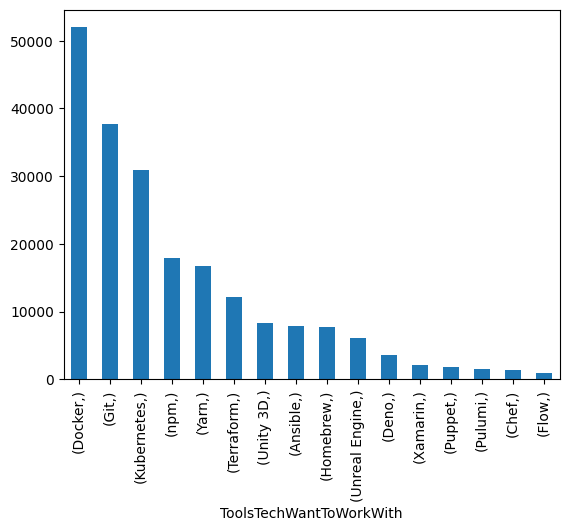

In [63]:
tools_count.plot(kind='bar')

#### Evaluation for Q3

Docker, Git and Kubernetes, are the tools the web developers most wanted to use, along side with Terraform, Ansible, etc.

It looks like the container/devops related technologies are gaining the momentum, the developers really want to spend time to work with these technologies.

### Conclusions

Our analysis of the Stack Overflow survey from 2018 to 2022 provided valuable insights into the developer community’s preferences and aspirations. I observed shifts in popularity, desired programming languages, and preferred tools and technologies. The web development landscape is constantly evolving, and it is essential for developers to stay informed about these trends to make informed decisions and keep their skillsets up to date.



### References

[blog](https://renshou753.github.io/hexo_en_blog/2023/07/08/udacity-data-science-blog/)